In [23]:
import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [24]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [25]:
import os
def plot_imgs(directory, top=10):
    all_item_dirs = os.listdir(directory)
    item_files = [os.path.join(directory, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(20, 20))
  
    for i, img_path in enumerate(item_files):
        plt.subplot(10, 10, i+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

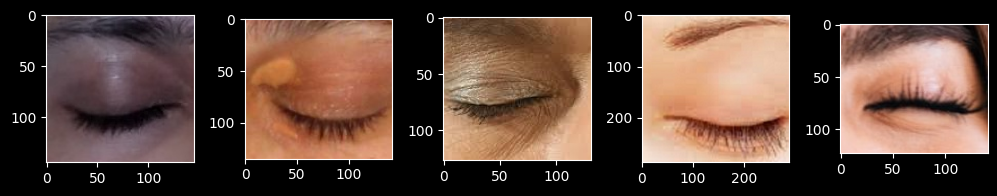

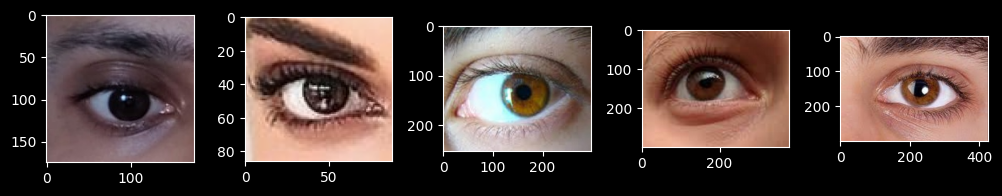

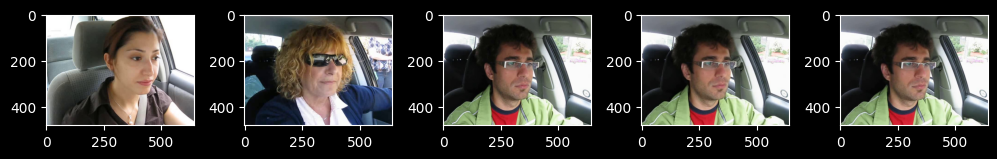

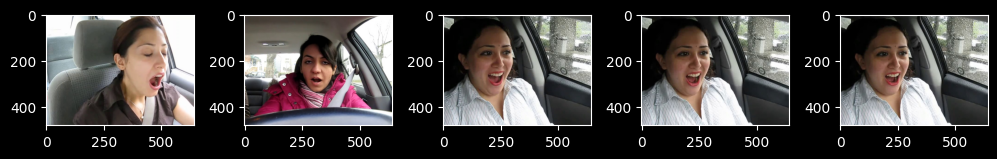

In [26]:
data_path = 'C:/Users/NathanRoger/Desktop/DevCode/HTML/web_Ai/Drowsiness_detection/train'

directories = ['/Closed', '/Open', '/no_yawn', '/yawn']

for j in directories:
    plot_imgs(data_path+j)

In [27]:
batch_size = 128
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  rescale = 1./255, 
                                  zoom_range = 0.2, 
                                  validation_split = 0.1)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [28]:
train_data_path = 'C:/Users/NathanRoger/Desktop/DevCode/HTML/web_Ai/Drowsiness_detection/train'
test_data_path = 'C:/Users/NathanRoger/Desktop/DevCode/HTML/web_Ai/Drowsiness_detection/test'

train_set = train_datagen.flow_from_directory(train_data_path, target_size = (256,256),
                                              batch_size = batch_size, 
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_data_path, target_size = (256,256),
                                              batch_size = batch_size, 
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical')

Found 2467 images belonging to 4 classes.
Found 433 images belonging to 4 classes.


In [29]:
train_data_path = 'C:/Users/NathanRoger/Desktop/DevCode/HTML/web_Ai/Drowsiness_detection/train'
test_data_path = 'C:/Users/NathanRoger/Desktop/DevCode/HTML/web_Ai/Drowsiness_detection/test'

train_set2 = train_datagen.flow_from_directory(train_data_path, target_size = (24,24),
                                              batch_size = batch_size, 
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical')

test_set2 = test_datagen.flow_from_directory(test_data_path, target_size = (24,24),
                                              batch_size = batch_size, 
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical')

Found 2467 images belonging to 4 classes.
Found 433 images belonging to 4 classes.


In [30]:
classes = 4

model = Sequential()
model.add(Conv2D(24, (3,3), padding = 'same', input_shape = (24,24,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))

model.add(Dense(classes, activation = 'softmax'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 24)        240       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 12, 12, 24)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)        13888     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 6, 6, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 3, 3, 128)        

In [32]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])

In [33]:
model_path="models_detext.h5"

checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, 
                              save_best_only=True, mode='max')

callbacks_list = [checkpoint]

In [34]:
num_epochs = 500
training_steps=train_set2.n//train_set2.batch_size
validation_steps =test_set2.n//test_set2.batch_size

In [35]:
history = model.fit_generator(train_set2, epochs=num_epochs, steps_per_epoch=training_steps,validation_data=test_set2,
                    validation_steps=validation_steps, callbacks = callbacks_list)

C:\Users\NathanRoger\AppData\Local\Temp\ipykernel_19716\3713874668.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_set2, epochs=num_epochs, steps_per_epoch=training_steps,validation_data=test_set2,


Epoch 1/500
19/19 [==============================] - ETA: 0s - loss: 1.2316 - accuracy: 0.4062
Epoch 1: val_accuracy improved from -inf to 0.65625, saving model to yawn_detection1.h5
19/19 [==============================] - 6s 267ms/step - loss: 1.2316 - accuracy: 0.4062 - val_loss: 0.9694 - val_accuracy: 0.6562
Epoch 2/500
 1/19 [>.............................] - ETA: 2s - loss: 0.9420 - accuracy: 0.7143

c:\Users\NathanRoger\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - ETA: 0s - loss: 0.7709 - accuracy: 0.6742
Epoch 2: val_accuracy improved from 0.65625 to 0.66146, saving model to yawn_detection1.h5
19/19 [==============================] - 5s 259ms/step - loss: 0.7709 - accuracy: 0.6742 - val_loss: 0.6269 - val_accuracy: 0.6615
Epoch 3/500
19/19 [==============================] - ETA: 0s - loss: 0.5648 - accuracy: 0.7277
Epoch 3: val_accuracy improved from 0.66146 to 0.72135, saving model to yawn_detection1.h5
19/19 [==============================] - 5s 255ms/step - loss: 0.5648 - accuracy: 0.7277 - val_loss: 0.5527 - val_accuracy: 0.7214
Epoch 4/500
19/19 [==============================] - ETA: 0s - loss: 0.5125 - accuracy: 0.7537
Epoch 4: val_accuracy did not improve from 0.72135
19/19 [==============================] - 5s 240ms/step - loss: 0.5125 - accuracy: 0.7537 - val_loss: 0.5198 - val_accuracy: 0.7188
Epoch 5/500
19/19 [==============================] - ETA: 0s - loss: 0.4504 - accuracy: 0.7678
Epoch 

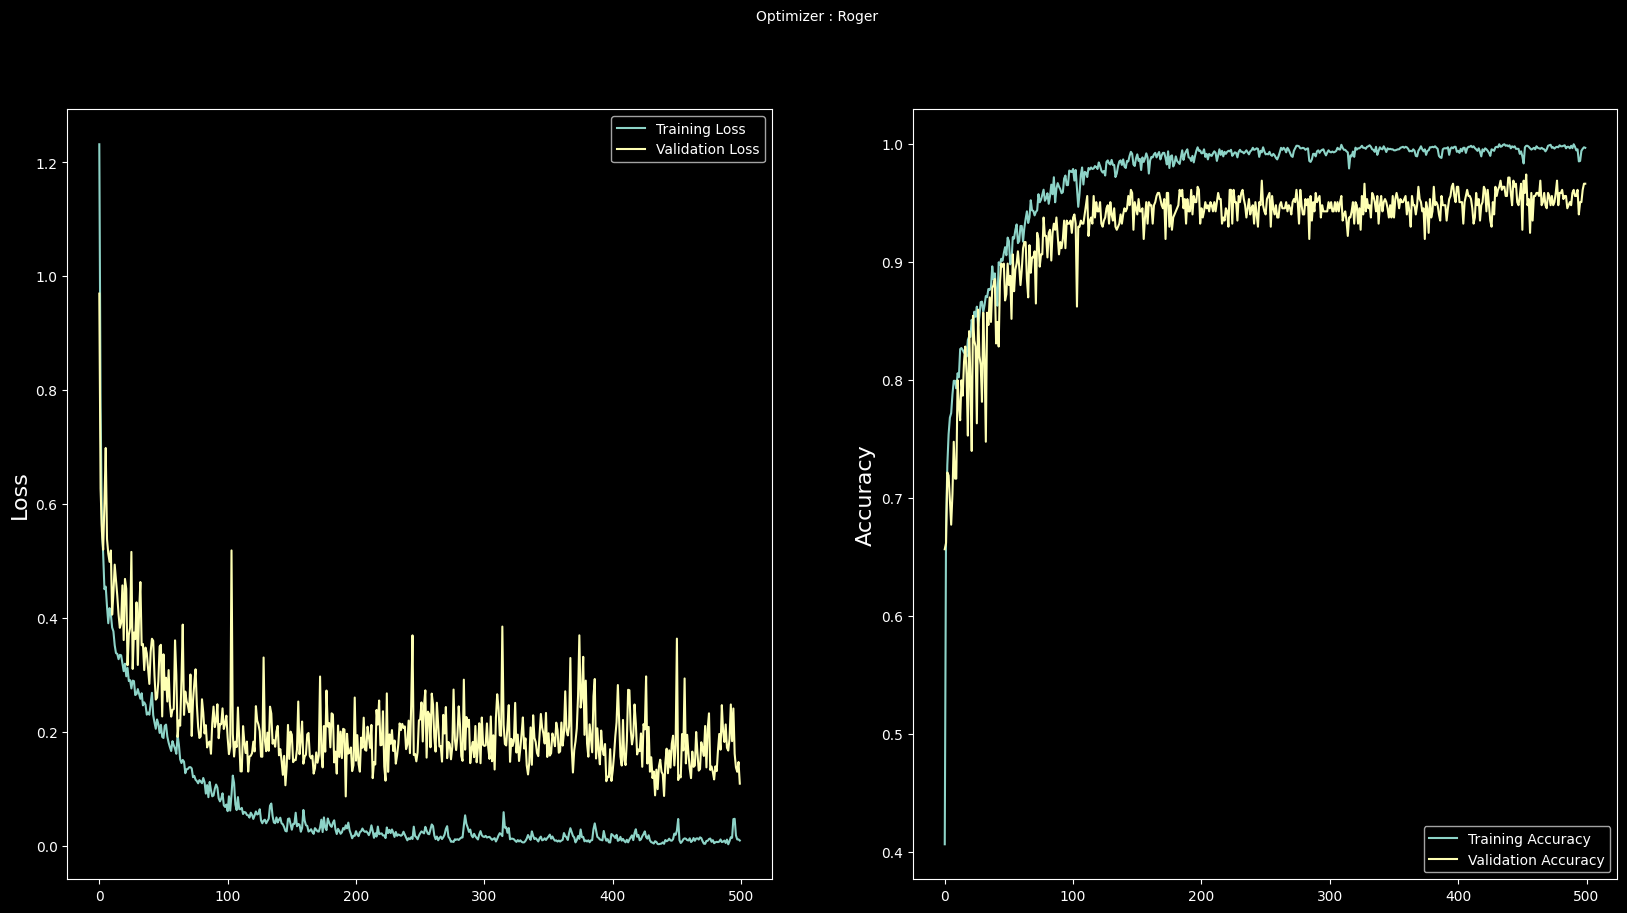

In [36]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Roger', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

Found 433 images belonging to 4 classes.


C:\Users\NathanRoger\AppData\Local\Temp\ipykernel_19612\712740531.py:20: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_set2)


              precision    recall  f1-score   support

      Closed       0.21      0.20      0.20       109
        Open       0.23      0.24      0.24       109
     no_yawn       0.27      0.27      0.27       109
        yawn       0.25      0.25      0.25       106

    accuracy                           0.24       433
   macro avg       0.24      0.24      0.24       433
weighted avg       0.24      0.24      0.24       433

[[22 28 27 32]
 [27 26 29 27]
 [30 29 29 21]
 [27 28 24 27]]


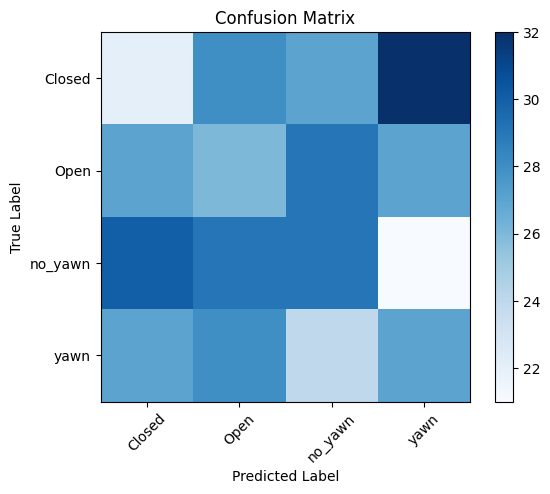

In [26]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

# Load the model
model = load_model("models_detext.h5")

# Define the test data generator
batch_size = 128
test_datagen = ImageDataGenerator(rescale=1./255)
test_data_path = 'C:/Users/NathanRoger/Desktop/DevCode/HTML/AI/Drowsiness_detection/test'
test_set2 = test_datagen.flow_from_directory(test_data_path, target_size=(24, 24),
                                             batch_size=batch_size,
                                             color_mode='grayscale',
                                             class_mode='categorical')

# Generate predictions for the test set
predictions = model.predict_generator(test_set2)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get true class labels
true_classes = test_set2.classes

# Get class labels
class_labels = list(test_set2.class_indices.keys())

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Create and display the Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print(conf_matrix)

plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [29]:
import numpy as np
from sklearn.metrics import average_precision_score
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

# Load the model
model = load_model("models_detext.h5")

# Define the test data generator
batch_size = 128
test_datagen = ImageDataGenerator(rescale=1./255)

test_data_path = 'C:/Users/NathanRoger/Desktop/DevCode/HTML/AI/Drowsiness_detection/test'
test_set2 = test_datagen.flow_from_directory(test_data_path, target_size=(24, 24),
                                             batch_size=batch_size,
                                             color_mode='grayscale',
                                             class_mode='categorical',
                                             shuffle=False)

# Generate predictions for the test set
predictions = model.predict_generator(test_set2)

# Calculate Average Precision (AP) for each class
average_precisions = []
n_classes = len(test_set2.class_indices)

for i in range(n_classes):
    average_precisions.append(average_precision_score(test_set2.labels == i, predictions[:, i]))

# Calculate mean Average Precision (mAP)
mAP = np.mean(average_precisions)
print("Mean Average Precision (mAP):", mAP)


Found 433 images belonging to 4 classes.


C:\Users\NathanRoger\AppData\Local\Temp\ipykernel_19612\1611761994.py:21: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_set2)


Mean Average Precision (mAP): 0.9939678784311486


In [30]:
# ตรวจสอบโมเดลจากไฟล์ models_detext.h5
from keras.models import load_model

model = load_model("models_detext.h5")

# สร้างข้อมูลทดสอบ
batch_size = 128
test_datagen = ImageDataGenerator(rescale=1./255)

test_data_path = 'C:/Users/NathanRoger/Desktop/DevCode/HTML/AI/Drowsiness_detection/test'
test_set = test_datagen.flow_from_directory(test_data_path, target_size=(24, 24),
                                            batch_size=batch_size,
                                            color_mode='grayscale',
                                            class_mode='categorical')

# ประเมินประสิทธิภาพของโมเดลบนชุดข้อมูลทดสอบ
evaluation = model.evaluate_generator(test_set)

print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])


Found 433 images belonging to 4 classes.


C:\Users\NathanRoger\AppData\Local\Temp\ipykernel_19612\3282944253.py:17: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  evaluation = model.evaluate_generator(test_set)



Test Loss: 0.12534993886947632
Test Accuracy: 0.9699769020080566
